<a href="https://colab.research.google.com/github/xtremeandroid/Employee-Behaviour-Analysis/blob/master/Prediction_of_Employee_Turnover_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Prediction Of Employee Turnover

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
URL = 'https://drive.google.com/file/d/17SwdmcjX-Lr0wF73Svhezh1m2eFf8hVm/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]

In [ ]:
df = pd.read_csv(path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
df.duplicated(keep="first").sum()

3008

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(11991, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## Exploratory Data Analysis

### Monthly Hours

In [ ]:
df["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [ ]:
bins = len(df["average_montly_hours"].unique())
bins

215

In [ ]:
sns.histplot??

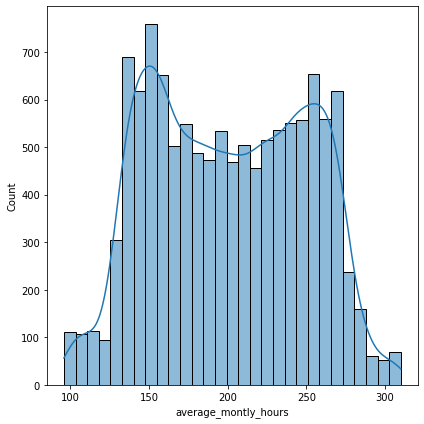

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(data = df, x = df["average_montly_hours"], kde=True)
plt.tight_layout()
plt.show()

### Number Of Projects

In [ ]:
df["number_project"].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

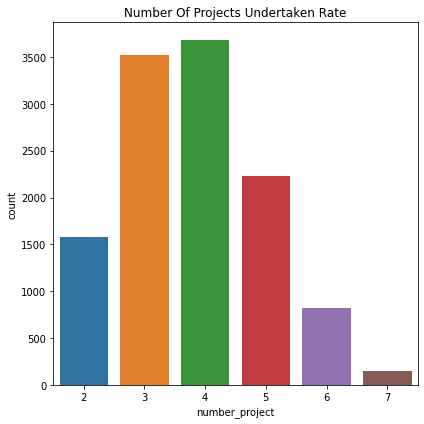

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="number_project")
plt.title("Number Of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

### Promotion Made In The Last 5 Years

In [ ]:
df["promotion_last_5years"].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [ ]:
labels = df["promotion_last_5years"].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels]
labels

['Not Promoted', 'Promoted']

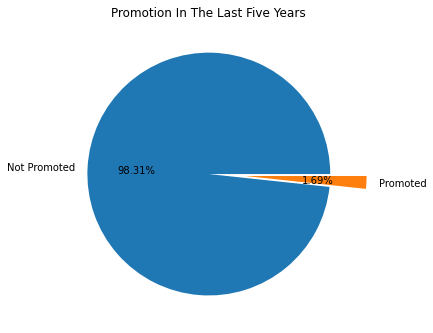

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(x = df["promotion_last_5years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.tight_layout()
plt.show()

### Work Accidents

In [ ]:
df["Work_accident"].value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

In [ ]:
labels = df["Work_accident"].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Work Accident" if i == 1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

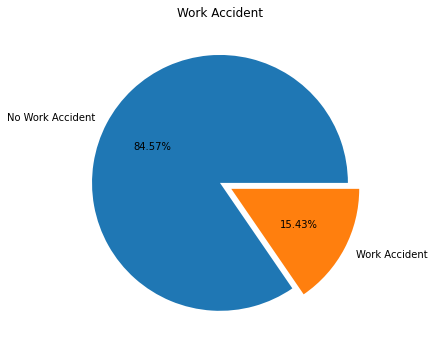

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(x = df["Work_accident"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Work Accident")
plt.tight_layout()
plt.show()

### Time Spent In Company

In [ ]:
df["time_spend_company"].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [ ]:
labels = df["time_spend_company"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

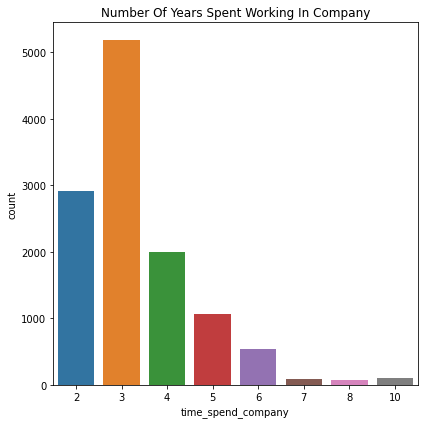

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "time_spend_company", data=df)
plt.title("Number Of Years Spent Working In Company")
plt.tight_layout()
plt.show()

In [ ]:
df["time_spend_company"].mean()

3.3648569760653824

### Department Comparison

In [ ]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df["sales"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

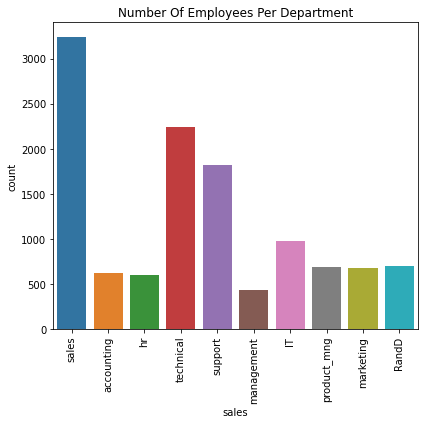

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "sales", data=df)
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df["salary"].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [ ]:
labels = df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

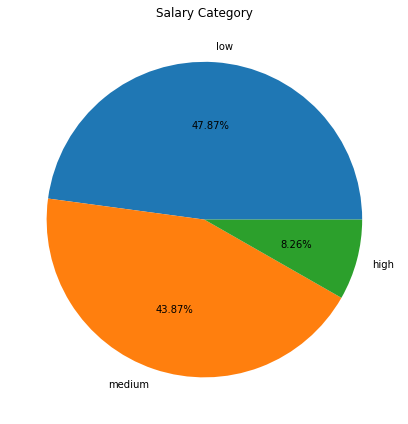

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Category")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
df.rename(columns={"sales": "department", "salary_leve": "salary_level"}, inplace=True)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

### Categorical Encoding

In [ ]:
categorical_cols = ["department", "salary_level"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="cat")

In [ ]:
encoded_cols

In [ ]:
df = df.join(encoded_cols)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.drop(["department", "salary_level"], inplace=True, axis="columns")

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')

### Min Max Scaling

In [ ]:
df["average_montly_hours"].min()

96

In [ ]:
df["average_montly_hours"].max()

310

### Split Data Into Train and Test

In [ ]:
X = df.drop("left", axis=1)
y = df["left"]

In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
X_train.shape

(9592, 20)

In [ ]:
X_test.shape

(2399, 20)

## Train Model

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
logReg = LogisticRegression(max_iter=2000)

In [ ]:
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
logReg_predictions = logReg.predict(X_test)

In [ ]:
accuracy_score(y_test, logReg_predictions)

0.8253438932888704

In [ ]:
print(classification_report(y_test, logReg_predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1995
           1       0.45      0.19      0.26       404

    accuracy                           0.83      2399
   macro avg       0.65      0.57      0.58      2399
weighted avg       0.79      0.83      0.79      2399



In [ ]:
cm = confusion_matrix(y_test, logReg_predictions)

In [ ]:
cm

array([[1905,   90],
       [ 329,   75]])

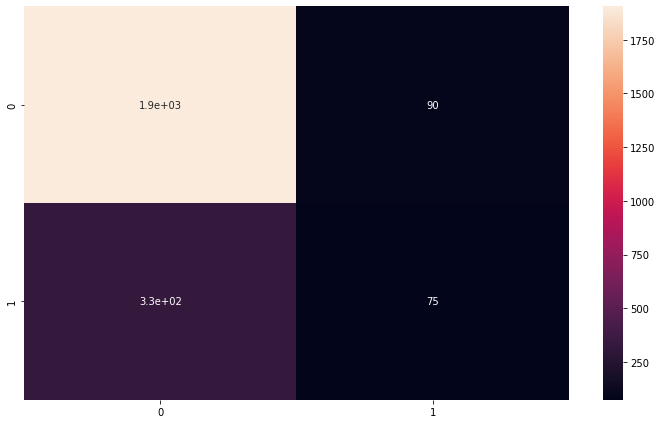

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ranForest = RandomForestClassifier(n_estimators=100)

In [ ]:
ranForest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
ranForest_predictions = ranForest.predict(X_test)

In [ ]:
accuracy_score(y_test, ranForest_predictions)

0.9849937473947478

In [ ]:
print(classification_report(y_test, ranForest_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1995
           1       0.99      0.92      0.95       404

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.98      0.98      2399



In [ ]:
cm = confusion_matrix(y_test, ranForest_predictions)

In [ ]:
cm

array([[1991,    4],
       [  32,  372]])

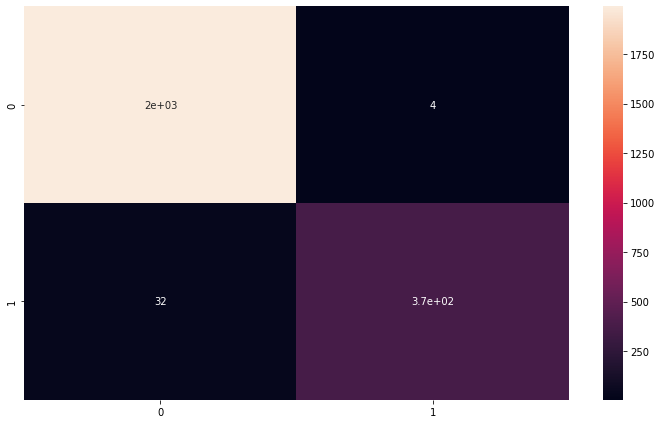

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
parameter = {
    'criterion': ["gini", "entropy"],
    "n_estimators": [10, 100, 150, 200],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"]
}

In [ ]:
kfold = StratifiedKFold(n_splits=5)

In [ ]:
clf = GridSearchCV(ranForest, parameter, scoring="accuracy", n_jobs=2, cv=kfold)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
clf.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator': RandomForestClassifier(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': 2,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'max_features': ['auto', 'sqrt', 'log2'],
  'min_samples_leaf': [1, 2, 4, 6],
  'n_estimators': [10, 100, 150, 200]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 '

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [ ]:
clf.best_score_

0.9825899938108623

In [ ]:
clf.score(X_test, y_test)

0.9845769070446019

### Save Model

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb") as model_file:
  pickle.dump(clf, model_file)